In [1]:
import os

class cfg():
    data_path = "/Users/user/Desktop/Algorun_24/data"

    seed = 42

    holidays_path = os.path.join(data_path, "holidays.csv")
    products_path = os.path.join(data_path, "products.csv")
    promotions_path = os.path.join(data_path, "promotions.csv")
    sample_submission_path = os.path.join(data_path, "sample_submission.csv")
    test_path = os.path.join(data_path, "test.csv")
    train_path = os.path.join(data_path, "train.csv")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


holidays_df = pd.read_csv(cfg.holidays_path)
products_df = pd.read_csv(cfg.products_path)
promotions_df = pd.read_csv(cfg.promotions_path)
sample_submission_df = pd.read_csv(cfg.sample_submission_path, delimiter='|')
test_df = pd.read_csv(cfg.test_path)
train_df = pd.read_csv(cfg.train_path)

# Convert columns to datetime format

train_df["week_starting_date"] = pd.to_datetime(train_df["week_starting_date"])
test_df["week_starting_date"] = pd.to_datetime(test_df["week_starting_date"])
sample_submission_df["week_starting_date"] = pd.to_datetime(sample_submission_df["week_starting_date"])

In [2]:
combined_df = train_df.merge(products_df, how="left", on="product_id")

combined_df.head()

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31


In [3]:
combined_df["product_group_1_2_3_code"] = combined_df["product_group_1_code"].astype(str) + "_" + combined_df["product_group_2_code"].astype(str) + "_" + combined_df["product_group_3_code"].astype(str)

In [4]:
combined_df["product_group_1_2_3_code"].unique()

array(['1_0_2', '4_2_12', '4_2_13', '4_2_0', '4_3_13', '2_4_7', '4_3_1',
       '1_2_0', '4_0_3', '4_3_0', '1_2_12', '0_1_0', '0_1_12', '1_2_13',
       '4_2_1', '1_0_3', '4_3_12', '1_0_10', '1_2_1', '4_5_12', '0_0_11',
       '4_5_0', '2_4_5', '0_1_13', '4_5_13', '2_4_9', '4_5_1', '4_0_2',
       '4_0_10', '2_4_8', '2_4_14', '3_6_4', '3_6_6'], dtype=object)

In [5]:
combined_df["product_group_1_2_3_4_code"] = combined_df["product_group_1_code"].astype(str) + "_" + combined_df["product_group_2_code"].astype(str) + "_" + combined_df["product_group_3_code"].astype(str) + "_" + combined_df["product_group_4_code"].astype(str)

In [6]:
combined_df["product_group_1_2_3_4_code"].unique()

array(['1_0_2_44', '4_2_12_34', '4_2_13_31', '4_2_13_16', '4_2_0_31',
       '4_3_13_31', '2_4_7_9', '4_3_1_45', '4_3_13_16', '1_2_0_38',
       '4_0_3_17', '2_4_7_42', '4_3_0_6', '1_2_12_34', '0_1_0_38',
       '0_1_12_40', '1_2_12_24', '1_2_13_31', '1_2_13_8', '4_2_1_45',
       '1_0_3_10', '4_3_12_34', '1_0_10_20', '4_2_13_29', '0_1_0_40',
       '1_2_1_18', '4_3_12_17', '4_5_12_34', '1_2_12_12', '0_1_12_25',
       '4_3_0_31', '4_2_0_6', '0_0_11_34', '0_0_11_25', '4_5_0_31',
       '0_0_11_32', '4_0_3_10', '1_0_3_34', '1_2_13_1', '1_2_12_11',
       '4_2_0_38', '2_4_5_23', '1_2_13_43', '1_2_13_29', '4_2_12_17',
       '0_1_13_40', '0_1_13_29', '4_5_13_21', '4_5_13_16', '0_1_13_25',
       '4_5_13_31', '2_4_9_28', '4_5_1_45', '4_0_2_19', '4_0_2_32',
       '1_0_3_17', '2_4_5_2', '2_4_9_36', '2_4_5_3', '1_2_0_31',
       '4_2_12_12', '1_0_2_32', '4_0_2_30', '4_5_0_38', '0_0_11_33',
       '1_0_3_41', '1_0_2_19', '0_1_12_34', '1_0_3_33', '0_1_12_12',
       '0_1_0_25', '2_4_9_22', '4_

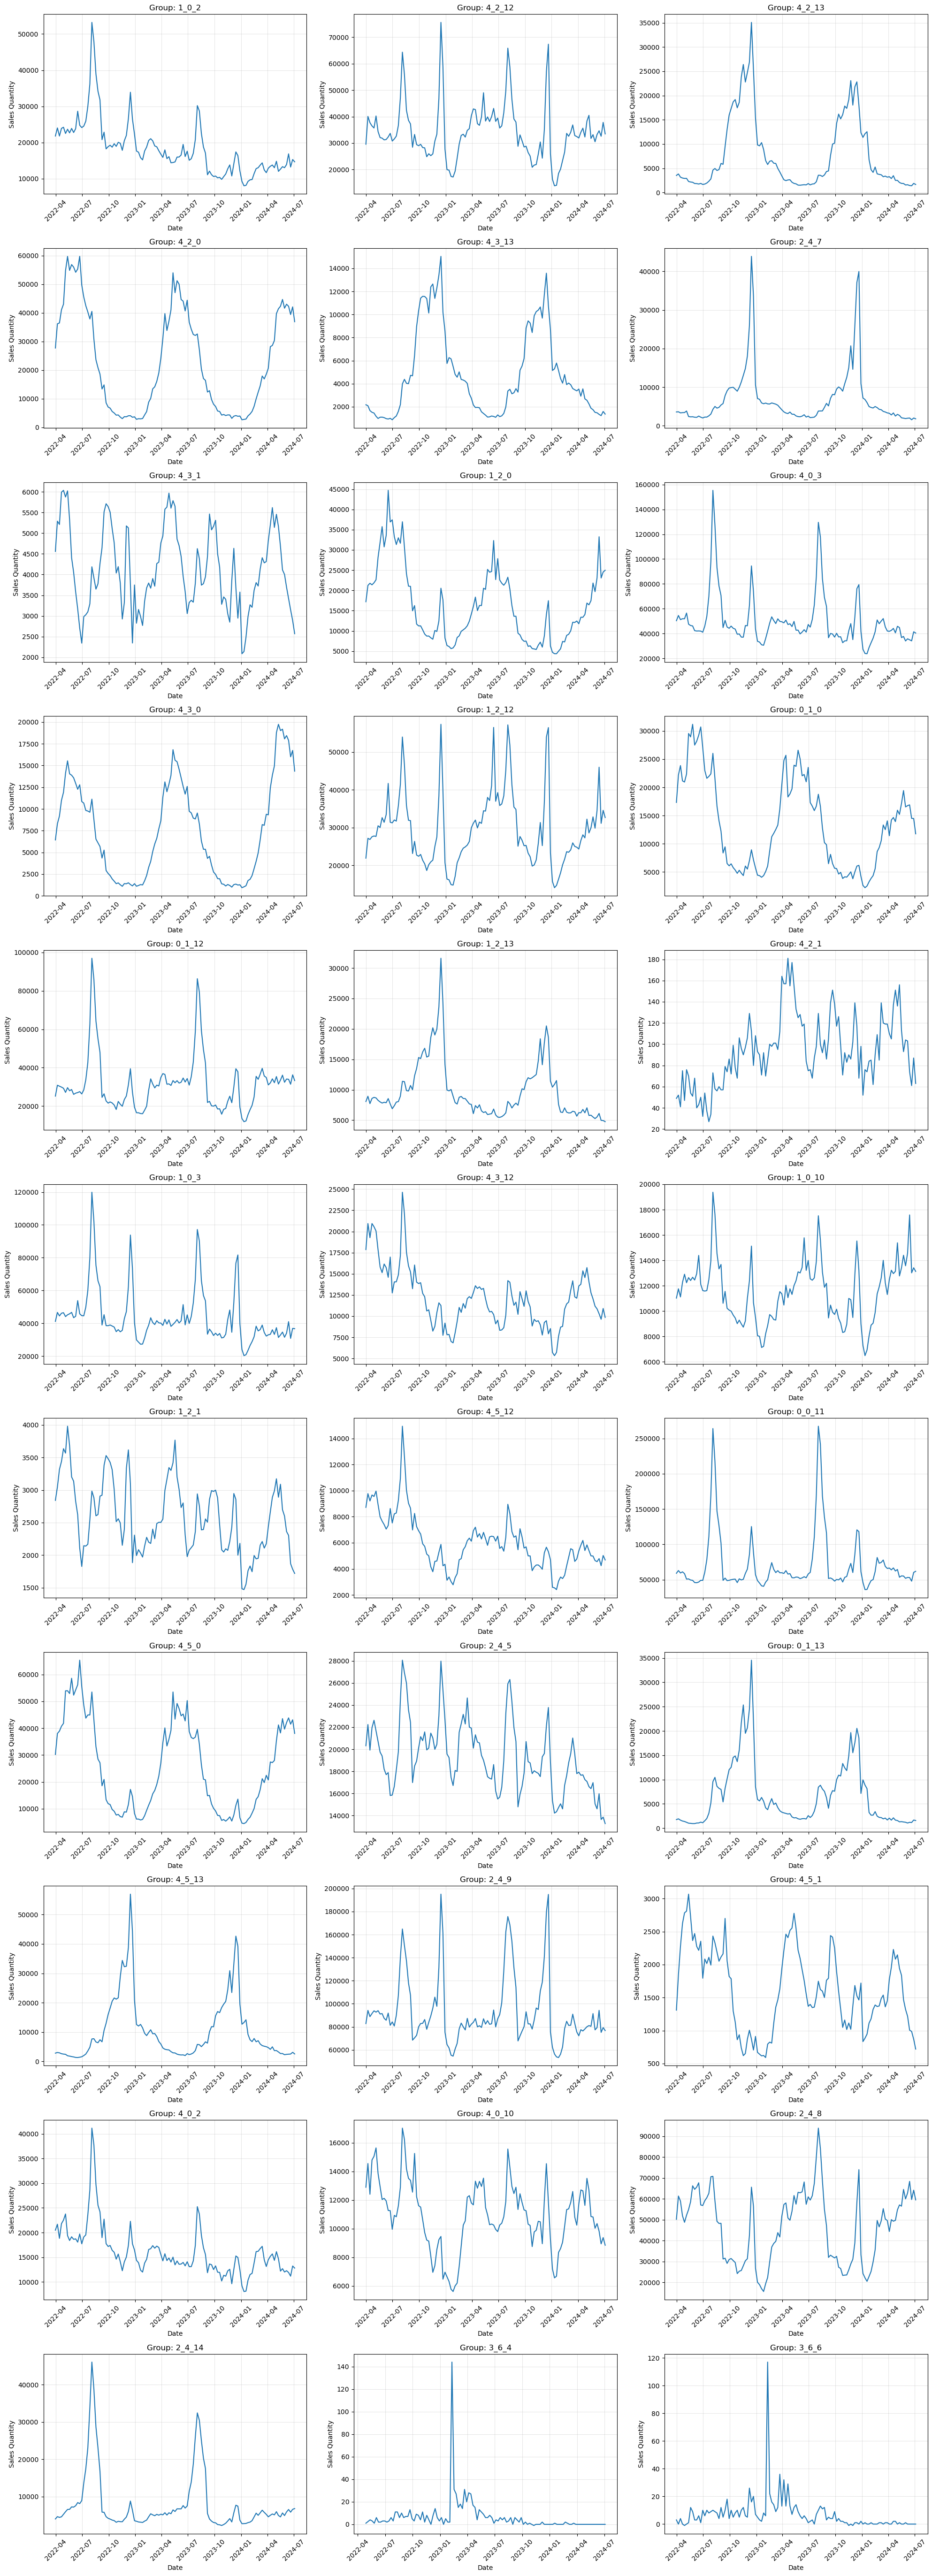


Summary Statistics by Group:
Group 1_0_2: Total sales = 2,198,347.0
Group 4_2_12: Total sales = 4,085,645.0
Group 4_2_13: Total sales = 917,178.0
Group 4_2_0: Total sales = 2,764,914.0
Group 4_3_13: Total sales = 568,926.0
Group 2_4_7: Total sales = 816,729.0
Group 4_3_1: Total sales = 490,468.0
Group 1_2_0: Total sales = 1,950,233.0
Group 4_0_3: Total sales = 5,959,108.0
Group 4_3_0: Total sales = 893,408.0
Group 1_2_12: Total sales = 3,531,974.0
Group 0_1_0: Total sales = 1,595,074.0
Group 0_1_12: Total sales = 3,747,555.0
Group 1_2_13: Total sales = 1,160,169.0
Group 4_2_1: Total sales = 11,144.0
Group 1_0_3: Total sales = 5,231,808.0
Group 4_3_12: Total sales = 1,446,215.0
Group 1_0_10: Total sales = 1,379,135.0
Group 1_2_1: Total sales = 307,351.0
Group 4_5_12: Total sales = 717,222.0
Group 0_0_11: Total sales = 8,494,577.0
Group 4_5_0: Total sales = 3,085,099.0
Group 2_4_5: Total sales = 2,302,390.0
Group 0_1_13: Total sales = 787,199.0
Group 4_5_13: Total sales = 1,236,783.0
Gr

In [7]:
# Get unique product group codes
unique_groups = combined_df['product_group_1_2_3_code'].unique()
num_groups = len(unique_groups)

# Calculate number of rows and columns for subplots
num_cols = 3  # You can adjust this
num_rows = (num_groups + num_cols - 1) // num_cols

# Create figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Create a plot for each product group
for idx, group in enumerate(unique_groups):
    # Filter data for this group
    group_data = combined_df[combined_df['product_group_1_2_3_code'] == group]
    
    # Calculate daily sales for this group
    daily_sales = group_data.groupby('week_starting_date')['sales_quantity'].sum().reset_index()
    
    # Plot on the corresponding subplot
    axes[idx].plot(daily_sales['week_starting_date'], daily_sales['sales_quantity'])
    axes[idx].set_title(f'Group: {group}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Sales Quantity')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots if any
for idx in range(num_groups, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Print summary statistics for each group
print("\nSummary Statistics by Group:")
for group in unique_groups:
    group_sales = combined_df[combined_df['product_group_1_2_3_code'] == group]['sales_quantity'].sum()
    print(f"Group {group}: Total sales = {group_sales:,}")


In [9]:
combined_df

,product_id,week_starting_date,sales_quantity,inventory,sales_revenue,price_without_tax,initial_price,brand,product_group_1_code,product_group_2_code,product_group_3_code,product_group_4_code,product_group_1_2_3_code,product_group_1_2_3_4_code
0,0,2022-07-14,8.0,NaN,37.12,NaN,NaN,15,1,0,2,44,1_0_2,1_0_2_44
1,0,2023-07-13,7.0,NaN,34.50,NaN,NaN,15,1,0,2,44,1_0_2,1_0_2_44
2,0,2023-10-05,3.0,NaN,13.11,NaN,NaN,15,1,0,2,44,1_0_2,1_0_2_44
3,1,2023-03-23,2.0,NaN,7.50,NaN,NaN,313,4,2,12,34,4_2_12,4_2_12_34
4,4,2024-06-13,0.0,0.0,0.00,69.99,69.99,322,4,2,13,31,4_2_13,4_2_13_31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763854,89712,2022-05-26,11.0,136.0,249.47,29.98,34.99,113,4,3,12,17,4_3_12,4_3_12_17
1763855,89712,2022-10-06,2.0,5.0,38.65,25.98,34.99,113,4,3,12,17,4_3_12,4_3_12_17
1763856,89715,2022-04-07,130.0,6670.0,6041.07,49.99,59.99,85,4,5,12,17,4_5_12,4_5_12_17
1763857,89715,2023-01-12,92.0,2713.0,4918.02,54.99,59.99,85,4,5,12,17,4_5_12,4_5_12_17


In [23]:
train_df = train_df.merge(products_df, on='product_id', how='left')

train_df["product_group_1_2_3_code"] = train_df["product_group_1_code"].astype(str) + "_" + train_df["product_group_2_code"].astype(str) + "_" + train_df["product_group_3_code"].astype(str)

In [24]:
# Third submission based on the sale of product groups(group_1) during last year same_time, and ratio of sale of products in the last 2 months

# Assuming your DataFrame 'df' has columns: 'product_id', 'product_group', 'sale_date', 'sale_amount'

shifted_train_df = train_df.copy()
shifted_train_df["week_starting_date"] = train_df["week_starting_date"] + dt.timedelta(days=371)

important_dates1 = list(test_df["week_starting_date"].unique())
prepared_shifted_train_df = shifted_train_df[
    shifted_train_df["week_starting_date"].isin(important_dates1)
][["week_starting_date", "product_id", "sales_quantity", "product_group_1_2_3_code"]]

# Group by week_starting_date and product_group_1_2_3_code and sum the sales_quantity
grouped_sales = prepared_shifted_train_df.groupby(
    ['week_starting_date', 'product_group_1_2_3_code'])['sales_quantity'].sum().reset_index()

# If you want to reshape the data to have product groups as columns
# pivoted_sales = grouped_sales.pivot(
#     index='week_starting_date', 
#     columns='product_group_1_2_3_code', 
#     values='sales_quantity'
# )


# First calculate the ratios as before
last_date = train_df['week_starting_date'].max()
two_months_ago = last_date - pd.DateOffset(months=2)
last_2months_df = train_df[train_df['week_starting_date'] >= two_months_ago]

# Calculate ratios
product_sales = last_2months_df.groupby('product_id')['sales_quantity'].sum()
group_sales = last_2months_df.groupby('product_group_1_2_3_code')['sales_quantity'].sum()

sales_ratio = (
    last_2months_df[['product_id', 'product_group_1_2_3_code']]
    .drop_duplicates()
    .set_index('product_id')
)

sales_ratio['product_sales'] = product_sales
sales_ratio['group_total_sales'] = sales_ratio['product_group_1_2_3_code'].map(group_sales)
sales_ratio['sales_ratio'] = sales_ratio['product_sales'] / sales_ratio['group_total_sales']
sales_ratio = sales_ratio.reset_index()



# Perform a merge operation instead of iterating
merged_data = pd.merge(
    grouped_sales[['week_starting_date', 'product_group_1_2_3_code', 'sales_quantity']],
    sales_ratio[['product_group_1_2_3_code', 'product_id', 'sales_ratio']],
    on='product_group_1_2_3_code'
)

# Vectorized calculation of predicted sales
merged_data['predicted_sales'] = merged_data['sales_quantity'] * merged_data['sales_ratio']

# Select required columns for final output
predictions_df = merged_data[['week_starting_date', 'product_id', 
                            'product_group_1_2_3_code', 'predicted_sales']]

In [25]:
predictions_df

,week_starting_date,product_id,product_group_1_2_3_code,predicted_sales
0,2024-07-11,1479,0_0_11,0.000000
1,2024-07-11,1807,0_0_11,0.244984
2,2024-07-11,1928,0_0_11,0.000000
3,2024-07-11,2270,0_0_11,0.000000
4,2024-07-11,4463,0_0_11,0.122492
...,...,...,...,...
173771,2024-08-01,68541,4_5_13,41.853421
173772,2024-08-01,37423,4_5_13,1.226474
173773,2024-08-01,86133,4_5_13,0.000000
173774,2024-08-01,34199,4_5_13,0.919855


In [26]:
predictions_df.describe()

,product_id,predicted_sales
count,173776.000000,173716.000000
mean,43328.625794,17.861890
std,25188.413096,101.598082
min,0.000000,-0.808570
25%,20935.750000,0.000000
50%,42691.500000,0.000000
75%,63920.750000,0.247221
max,89717.000000,6591.471846


In [ ]:
third_submission_df = sample_submission_df.copy()

third_submission_df = third_submission_df.merge(predictions_df, on=["product_id","week_starting_date"], how="left")

third_submission_df["prediction"] = third_submission_df["predicted_sales"]

third_submission_df = third_submission_df[["product_id", "week_starting_date", "prediction"]]

# Making negative numbers in prediction equal to 0
third_submission_df.loc[third_submission_df["prediction"] < 0, "prediction"] = 0

third_submission_df.fillna(0,inplace=True)